# Statistiques descriptives

### Packages et chargement des bases

In [1]:
Navire_test=pd.read_csv(folder+"Données\\Navire_apprentissage_stat.csv")

NameError: name 'pd' is not defined

In [102]:
Navire_test=Navire_test[['id_nav_flotteur','date_francisation','annee_construction','genre_navigation','jauge_oslo','longueur_hors_tout','materiau_coque','nombre_moteur','num_version','puissance_administrative','situation_flotteur','type_carburant','type_moteur','nb_max_equipage','effectif_minimum']]

In [103]:
Navire_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10258 entries, 0 to 10257
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_nav_flotteur           10258 non-null  int64  
 1   date_francisation         9797 non-null   object 
 2   annee_construction        10258 non-null  float64
 3   genre_navigation          9287 non-null   object 
 4   jauge_oslo                8971 non-null   float64
 5   longueur_hors_tout        10258 non-null  float64
 6   materiau_coque            10258 non-null  object 
 7   nombre_moteur             10122 non-null  float64
 8   num_version               10258 non-null  float64
 9   puissance_administrative  10076 non-null  float64
 10  situation_flotteur        10258 non-null  object 
 11  type_carburant            10122 non-null  object 
 12  type_moteur               10035 non-null  object 
 13  nb_max_equipage           2350 non-null   float64
 14  effect

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
folder="C:\\Users\\quentin.mascart\\Documents\\Stage DAM\\CibNav\\"

In [4]:
Navire=pd.read_csv(folder+"Données\\Navire.csv")
Historique=pd.read_csv(folder+"Données\\DataTrain.csv")
Historique_prescriptions=pd.read_csv(folder+"Données\\Historique_Visite.csv")

In [5]:
Navire=Navire[['ID Nav Flotteur','Date Francisation', 'Annee Construction', 'Genre Navigation', 'Jauge Oslo', 'Longueur Hors Tout', 'Materiau Coque', 'Nombre Moteur', 'Num Version', 'Puissance Administrative', 'Situation Flotteur', 'Type Carburant', 'Type Moteur']]
Historique=Historique[['ID Nav Flotteur','Sitrep History','Annee Visite','ID Gin Visite']]
del (Historique_prescriptions['ID Nav Flotteur'])

In [6]:
df=pd.merge(Historique,Navire,on='ID Nav Flotteur')
df=pd.merge(df,Historique_prescriptions,on='ID Gin Visite')

In [7]:
df['Annee_Francisation']=df['Date Francisation'].str.slice(0, 4)
df['Annee_Francisation']=pd.to_numeric(df['Annee_Francisation'])
df['age_francisation']=df['Annee Visite']-df['Annee_Francisation']
df['age']=df['Annee Visite']-df['Annee Construction']
#df=df.drop(['Annee Construction', 'Annee Visite'], axis=1)
df['Prescriptions Majeures'] = df['Nombre Prescriptions Majeurs'].apply(lambda x: '1' if x > 0 else '0').astype(int)

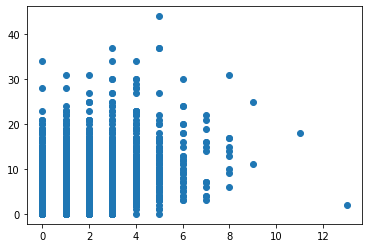

In [11]:
plt.scatter(df['Nombre Prescriptions Majeurs'],df['Nombre Prescriptions'])

In [19]:
df.corr()

,ID Nav Flotteur,Sitrep History,Annee Visite,ID Gin Visite,Annee Construction,Jauge Oslo,Longueur Hors Tout,Nombre Moteur,Num Version,Puissance Administrative,Nombre Prescriptions,Nombre Prescriptions Majeurs,Annee_Francisation,age_francisation,age,Prescriptions Majeures
ID Nav Flotteur,1.000000,-0.040657,0.040949,0.040977,0.479809,0.075899,0.115833,0.142986,-0.038962,0.226065,-0.025022,-0.022286,0.306650,-0.302059,-0.474720,-0.019084
Sitrep History,-0.040657,1.000000,0.061132,0.069666,-0.065002,0.344169,0.326797,-0.056812,0.260039,0.136773,0.183015,0.201733,-0.053096,0.059498,0.071056,0.153591
Annee Visite,0.040949,0.061132,1.000000,0.976310,0.031119,-0.008192,0.000347,0.015001,0.017036,0.009664,-0.018097,-0.019942,0.036546,0.065627,0.070072,-0.013143
ID Gin Visite,0.040977,0.069666,0.976310,1.000000,0.026494,-0.010149,-0.000727,0.008869,0.020548,0.004015,-0.010877,-0.011641,0.031221,0.068522,0.072292,-0.005485
Annee Construction,0.479809,-0.065002,0.031119,0.026494,1.000000,0.073092,0.055665,0.193363,-0.111114,0.266803,-0.088601,-0.075229,0.701312,-0.697334,-0.994878,-0.072201
Jauge Oslo,0.075899,0.344169,-0.008192,-0.010149,0.073092,1.000000,0.868742,0.212811,0.235538,0.625131,0.166240,0.151919,0.036477,-0.037179,-0.073542,0.116192
Longueur Hors Tout,0.115833,0.326797,0.000347,-0.000727,0.055665,0.868742,1.000000,0.143998,0.264169,0.659005,0.191521,0.167263,0.025525,-0.025525,-0.055520,0.137917
Nombre Moteur,0.142986,-0.056812,0.015001,0.008869,0.193363,0.212811,0.143998,1.000000,-0.026184,0.277397,-0.028588,-0.068459,0.151544,-0.149943,-0.191472,-0.039573
Num Version,-0.038962,0.260039,0.017036,0.020548,-0.111114,0.235538,0.264169,-0.026184,1.000000,0.131153,0.183201,0.205909,-0.053715,0.055496,0.112618,0.181601
Puissance Administrative,0.226065,0.136773,0.009664,0.004015,0.266803,0.625131,0.659005,0.277397,0.131153,1.000000,0.062696,0.052289,0.200470,-0.199410,-0.265334,0.038001


In [53]:
Navire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10907 entries, 0 to 10906
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID Nav Flotteur           10907 non-null  int64  
 1   Date Francisation         10344 non-null  object 
 2   Annee Construction        10907 non-null  float64
 3   Genre Navigation          9863 non-null   object 
 4   Jauge Oslo                9321 non-null   float64
 5   Longueur Hors Tout        10907 non-null  float64
 6   Materiau Coque            10907 non-null  object 
 7   Nombre Moteur             10773 non-null  float64
 8   Num Version               10886 non-null  float64
 9   Puissance Administrative  10714 non-null  float64
 10  Situation Flotteur        10907 non-null  object 
 11  Type Carburant            10773 non-null  object 
 12  Type Moteur               10671 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 1.1+ MB


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22425 entries, 0 to 22424
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID Nav Flotteur               22425 non-null  float64
 1   Sitrep History                22425 non-null  int64  
 2   Annee Visite                  22425 non-null  int64  
 3   ID Gin Visite                 22425 non-null  int64  
 4   Date Francisation             21597 non-null  object 
 5   Annee Construction            22425 non-null  float64
 6   Genre Navigation              20834 non-null  object 
 7   Jauge Oslo                    20978 non-null  float64
 8   Longueur Hors Tout            22425 non-null  float64
 9   Materiau Coque                22425 non-null  object 
 10  Nombre Moteur                 22113 non-null  float64
 11  Num Version                   22425 non-null  float64
 12  Puissance Administrative      22027 non-null  float64
 13  S

In [92]:
lag=max(df['ID Nav Flotteur'].value_counts())
#On génère lag-points espacés logarithmiquement de 1 à 10
poids=list(np.logspace(0, 0.5, lag, endpoint=True))[::-1] #Pour inverser la liste
poids

[3.1622776601683795,
 2.51188643150958,
 1.9952623149688797,
 1.5848931924611136,
 1.2589254117941673,
 1.0]

In [93]:
def pondération(data,poids,variable,unite):
    """Cette fonction permet de selectionner un vecteur et de pondérer son historique en fonction
    de poids."""
    df= data.copy(deep=True)#On copie pour ne pas modifier directement notre Dataframe
    df["nom"]=0

    for i in range(0,len(poids)): #On boucle sur l'historique et on affecte un poids a chaque visite antérieure
        df["poids"]=poids[i]*df.groupby([unite])[variable].shift(i+1)
        df['nom'] = df.fillna(0)['nom'] + df.fillna(0)["poids"]
        
    del (df['poids'])
    df[variable]=df['nom']
    del (df['nom'])
    
    return(df)

In [94]:
df=pondération(df,poids,'Nombre Prescriptions','ID Nav Flotteur')
df=pondération(df,poids,'Nombre Prescriptions Majeurs','ID Nav Flotteur')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22425 entries, 0 to 22424
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID Nav Flotteur               22425 non-null  float64
 1   Sitrep History                22425 non-null  int64  
 2   ID Gin Visite                 22425 non-null  int64  
 3   Date Francisation             21597 non-null  object 
 4   Genre Navigation              20834 non-null  object 
 5   Jauge Oslo                    20978 non-null  float64
 6   Longueur Hors Tout            22425 non-null  float64
 7   Materiau Coque                22425 non-null  object 
 8   Nombre Moteur                 22113 non-null  float64
 9   Num Version                   22425 non-null  float64
 10  Puissance Administrative      22027 non-null  float64
 11  Situation Flotteur            22425 non-null  object 
 12  Type Carburant                22113 non-null  object 
 13  T

# Statistiques descriptives

### Variables continues

In [79]:
df.columns

Index(['ID Nav Flotteur', 'Sitrep History', 'ID Gin Visite',
       'Date Francisation', 'Genre Navigation', 'Jauge Oslo',
       'Longueur Hors Tout', 'Materiau Coque', 'Nombre Moteur', 'Num Version',
       'Puissance Administrative', 'Situation Flotteur', 'Type Carburant',
       'Type Moteur', 'Date Visite', 'Nombre Prescriptions',
       'Nombre Prescriptions Majeurs', 'Annee_Francisation',
       'age_francisation', 'age', 'Prescriptions Majeures'],
      dtype='object')

In [2]:
num=['Nombre Prescriptions','Nombre Prescriptions Majeurs','Sitrep History','Jauge Oslo','Longueur Hors Tout','Puissance Administrative','age']

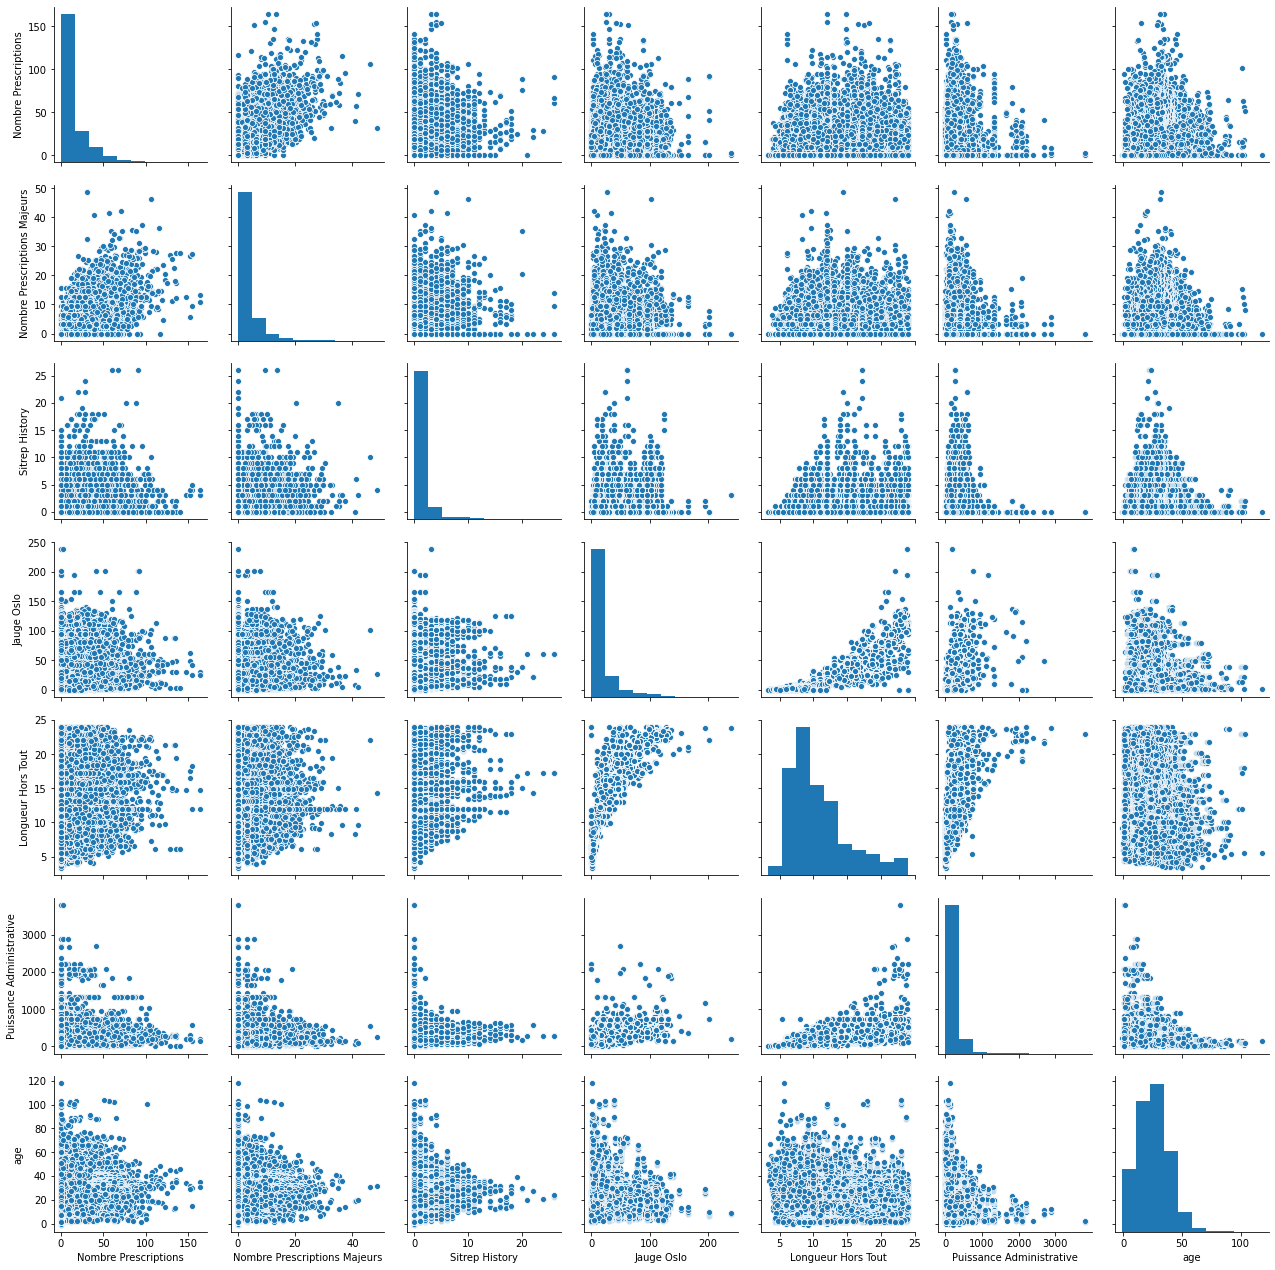

In [96]:
sns.pairplot(df[num])

# Variables catégorielles

In [140]:
df['Prescriptions Majeures'].sum()/len(df)

0.38220735785953175

In [16]:
df.head(10)

,ID Nav Flotteur,Sitrep History,Annee Visite,ID Gin Visite,Date Francisation,Annee Construction,Genre Navigation,Jauge Oslo,Longueur Hors Tout,Materiau Coque,...,Situation Flotteur,Type Carburant,Type Moteur,Date Visite,Nombre Prescriptions,Nombre Prescriptions Majeurs,Annee_Francisation,age_francisation,age,Prescriptions Majeures
0,3774.0,0,2016,92531,2000-10-25T00:00:00.000+02:00,1971.0,Petite pêche,3.20,6.03,PLASTIQUE,...,Français pêche,ESSENCE,Explosion,2016-03-10T00:00:00.000+01:00,1.0,0.0,2000.0,16.0,45.0,0
1,3774.0,0,2017,104235,2000-10-25T00:00:00.000+02:00,1971.0,Petite pêche,3.20,6.03,PLASTIQUE,...,Français pêche,ESSENCE,Explosion,2017-03-02T00:00:00.000+01:00,3.0,0.0,2000.0,17.0,46.0,0
2,3774.0,0,2018,116998,2000-10-25T00:00:00.000+02:00,1971.0,Petite pêche,3.20,6.03,PLASTIQUE,...,Français pêche,ESSENCE,Explosion,2018-03-21T00:00:00.000+01:00,13.0,1.0,2000.0,18.0,47.0,1
3,3774.0,0,2018,119284,2000-10-25T00:00:00.000+02:00,1971.0,Petite pêche,3.20,6.03,PLASTIQUE,...,Français pêche,ESSENCE,Explosion,2018-04-30T00:00:00.000+02:00,0.0,0.0,2000.0,18.0,47.0,0
4,3774.0,0,2019,129696,2000-10-25T00:00:00.000+02:00,1971.0,Petite pêche,3.20,6.03,PLASTIQUE,...,Français pêche,ESSENCE,Explosion,2019-03-28T00:00:00.000+01:00,3.0,0.0,2000.0,19.0,48.0,0
5,15669.0,0,2020,143307,2010-12-15T00:00:00.000+01:00,1972.0,Petite pêche,4.25,7.66,POLYESTER EPOXY,...,Français pêche,ESSENCE,Explosion,2020-08-04T00:00:00.000+02:00,6.0,1.0,2010.0,10.0,48.0,1
6,21966.0,0,2017,103076,2019-07-10T00:00:00.000+02:00,1970.0,Petite pêche,6.68,8.33,POLYESTER EPOXY,...,Français pêche,ESSENCE,Explosion,2017-01-05T00:00:00.000+01:00,3.0,0.0,2019.0,-2.0,47.0,0
7,21966.0,0,2019,133251,2019-07-10T00:00:00.000+02:00,1970.0,Petite pêche,6.68,8.33,POLYESTER EPOXY,...,Français pêche,ESSENCE,Explosion,2019-07-04T00:00:00.000+02:00,0.0,0.0,2019.0,0.0,49.0,0
8,24885.0,0,2017,110174,2019-09-23T00:00:00.000+02:00,1971.0,Petite pêche,0.68,3.50,PLASTIQUE,...,Français pêche,ESSENCE,Explosion,2017-07-28T00:00:00.000+02:00,2.0,NaN,2019.0,-2.0,46.0,0
9,31912.0,1,2017,106423,2002-08-13T00:00:00.000+02:00,1972.0,Petite pêche,4.71,7.87,PLASTIQUE,...,Français pêche,GAZOLE,Combustion Interne,2017-04-20T00:00:00.000+02:00,7.0,1.0,2002.0,15.0,45.0,1


In [12]:
def tableau(variable):
    A=df.groupby(variable)['Prescriptions Majeures'].sum()/df.groupby(variable)['Prescriptions Majeures'].count() #Calcul de la proportion des visites ayant eu une prescription majeure
    B=df.groupby(variable)['Nombre Prescriptions'].count()
    A=pd.merge(A,B,on=variable)
    return(A.sort_values('Nombre Prescriptions',ascending=False))

In [164]:
tableau('Nombre Moteur')

,Prescriptions Majeures,Nombre Prescriptions
Nombre Moteur,,
1.0,0.401702,17198
2.0,0.319363,4560
0.0,0.336323,223
3.0,0.307692,39
96.0,0.000000,1


In [162]:
tableau('Situation Flotteur')

,Prescriptions Majeures,Nombre Prescriptions
Situation Flotteur,,
Français pêche,0.402857,17432
Français Commerce,0.308832,4900


In [163]:
tableau('Type Carburant')

,Prescriptions Majeures,Nombre Prescriptions
Type Carburant,,
GAZOLE,0.453745,13798
ESSENCE,0.263844,7950
INCONNU,0.326633,199
ELECTRICITE,0.373134,67
AUTRE,0.600000,5
MIXTE,0.000000,2


In [161]:
tableau('Genre Navigation')

,Prescriptions Majeures,Nombre Prescriptions
Genre Navigation,,
Petite pêche,0.382435,11460
Navigation côtière,0.351880,2652
Conchyl.Pure,0.363763,2136
Pêche côtière,0.563199,1781
Plaisance NC,0.183897,999
Pêche au large,0.620384,675
Conchyl.PetitePêche,0.239700,266
Pilotage,0.274775,221
Lamanage Nav cot,0.347368,190


In [13]:
tableau('Num Version')

,Prescriptions Majeures,Nombre Prescriptions
Num Version,,
5.0,0.304946,2682
6.0,0.353351,2577
4.0,0.282241,2409
7.0,0.348886,2365
8.0,0.398673,1954
9.0,0.436393,1855
10.0,0.444590,1523
3.0,0.254237,1520
11.0,0.484776,1244


In [157]:
tableau('Materiau Coque')

,Prescriptions Majeures,Nombre Prescriptions
Materiau Coque,,
PLASTIQUE,0.357649,10407
METAL,0.430861,4852
BOIS,0.440000,3927
POLYESTER EPOXY,0.253762,1454
AG/4 - ALU,0.377539,833
AUTRES,0.392361,286
PNEUMATIQUE,0.242105,189
ACIER,0.491228,171
ALLIAGE LEGER,0.426829,82


A faire : regarder le nombre de bateau dans chaque catégorie. Car peut biaisé si peu de bateau font beaucoup de visite 

# Analyse des successions de visites


D'après Sebastien : si il y a eu une prescription majeure le bateau ne peut pas repartir et dois refaire une visite dans un certain laps de temps.
Peut-être pas très utile de prédire ces visites car logiquement le problème est censé avoir disparu => augmente artificiellement la proportion de visite sans prescription majeure.

Cette partie analyse le délais entre chaque visite pour voir si effectivement après une visite ayant présenté une prescription majeure on suit une visite sans prescription.

on crée un df Verification sur lequel nous allons travailler.

In [28]:
Verification=df[['ID Nav Flotteur','Nombre Prescriptions Majeurs','Date Visite']]
Verification=Verification.dropna()
Verification['Date Visite']=Verification['Date Visite'].str.slice(0, 10)
Verification['Date Visite']=pd.to_datetime(Verification['Date Visite'])

Nous faisons deux choses :
- établissement des écarts entre chaque visite
- établissement de la différence du nombre de préscription entre chaque visite. (Si on passe de n a 0 on obtient un nombre négatif)

In [29]:
Verification["écart"]=Verification.groupby(["ID Nav Flotteur"])["Date Visite"].shift(1)
Verification["correction"]=Verification.groupby(["ID Nav Flotteur"])["Nombre Prescriptions Majeurs"].shift(1)
Verification.fillna(0)
Verification["écart"]=(Verification["Date Visite"]-Verification["écart"]).dt.days
Verification.fillna(0)
Verification["correction"]=(Verification["Nombre Prescriptions Majeurs"]-Verification["correction"])

On supprime les Na ie : les premières visites de chaque navires.

In [30]:
Verification.groupby('ID Nav Flotteur').

,ID Nav Flotteur,Nombre Prescriptions Majeurs,Date Visite,écart,correction
0,3774.0,0.0,2016-03-10,NaN,NaN
1,3774.0,0.0,2017-03-02,357.0,0.0
2,3774.0,1.0,2018-03-21,384.0,1.0
3,3774.0,0.0,2018-04-30,40.0,-1.0
4,3774.0,0.0,2019-03-28,332.0,0.0
...,...,...,...,...,...
22420,1877208.0,0.0,2019-09-05,NaN,NaN
22421,1877638.0,1.0,2020-09-29,NaN,NaN
22422,1878044.0,0.0,2020-05-28,NaN,NaN
22423,1878447.0,0.0,2020-10-16,NaN,NaN


In [31]:
Verification[Verification['ID Nav Flotteur']==63490.0]

,ID Nav Flotteur,Nombre Prescriptions Majeurs,Date Visite,écart,correction
26,63490.0,1.0,2016-03-30,NaN,NaN
27,63490.0,1.0,2017-03-15,350.0,0.0
28,63490.0,0.0,2019-03-12,727.0,-1.0
29,63490.0,1.0,2020-03-13,367.0,1.0


In [32]:
Verification[Verification['correction']<0]

,ID Nav Flotteur,Nombre Prescriptions Majeurs,Date Visite,écart,correction
3,3774.0,0.0,2018-04-30,40.0,-1.0
10,31912.0,0.0,2018-01-26,281.0,-1.0
14,40246.0,0.0,2019-06-12,463.0,-2.0
19,40610.0,0.0,2020-10-30,542.0,-1.0
28,63490.0,0.0,2019-03-12,727.0,-1.0
...,...,...,...,...,...
22321,1843858.0,0.0,2019-12-05,363.0,-2.0
22349,1848371.0,0.0,2020-06-09,453.0,-4.0
22353,1848685.0,0.0,2020-02-20,357.0,-3.0
22367,1850337.0,0.0,2020-06-11,370.0,-1.0


Distribution des écart entre deux visites

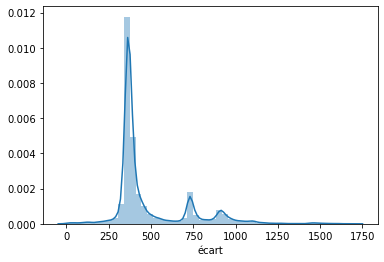

In [33]:
sns.distplot(Verification['écart'])

In [34]:
Verification['écart'].mean()

482.63758945386064

Distribution des écart entre deux visites pour les visites supposées de contrôles

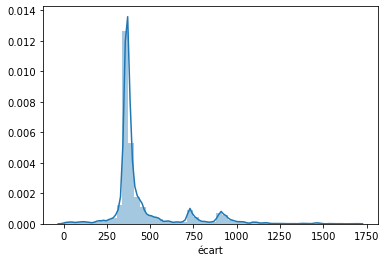

In [35]:
sns.distplot(Verification[Verification['correction']<0]['écart'])

In [36]:
Verification[Verification['correction']<0]['écart'].mean()

449.7185122569738

Est-ce que toutes les visites rapprochés sont des visites de contrôle ?

In [50]:
Verification[Verification['écart']<200]['correction'].value_counts()

 0.0    96
-1.0    49
 1.0    16
-2.0    16
-3.0     8
 2.0     5
-4.0     4
-5.0     2
-8.0     1
Name: correction, dtype: int64

In [51]:
Verification[Verification['écart']<200]

,ID Nav Flotteur,Nombre Prescriptions Majeurs,Date Visite,écart,correction
3,3774.0,0.0,2018-04-30,40.0,-1.0
75,174757.0,0.0,2017-06-07,22.0,-8.0
77,174757.0,2.0,2018-11-13,42.0,-1.0
78,174757.0,0.0,2019-01-08,56.0,-2.0
107,211146.0,0.0,2017-06-14,111.0,-1.0
...,...,...,...,...,...
21989,1807651.0,0.0,2020-06-25,197.0,0.0
22113,1820668.0,0.0,2019-05-02,56.0,-1.0
22195,1828028.0,0.0,2018-01-26,73.0,-1.0
22206,1828237.0,0.0,2019-05-05,101.0,-1.0
